In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import cv2
import os
import pandas as pd
from skimage.measure import blur_effect
import seaborn as sns
from skimage.feature import canny
from skimage.filters import sobel

In [2]:
temp_list = []

for root, dirs, files in os.walk('./blur_dataset/'):
    if root != './blur_dataset/':
        current_folder = []
        for file in files:
            current_folder.append(os.path.join(root,file))
        current_folder.sort()
        temp_list.append(current_folder)
temp_list

[['./blur_dataset/defocused_blurred/0_IPHONE-SE_F.JPG',
  './blur_dataset/defocused_blurred/100_NIKON-D3400-35MM_F.JPG',
  './blur_dataset/defocused_blurred/101_NIKON-D3400-35MM_F.JPG',
  './blur_dataset/defocused_blurred/102_NIKON-D3400-35MM_F.JPG',
  './blur_dataset/defocused_blurred/103_HUAWEI-P20_F.jpg',
  './blur_dataset/defocused_blurred/104_IPHONE-SE_F.jpg',
  './blur_dataset/defocused_blurred/105_IPHONE-SE_F.jpg',
  './blur_dataset/defocused_blurred/106_NIKON-D3400-35MM_F.JPG',
  './blur_dataset/defocused_blurred/107_XIAOMI-MI8-SE_F.jpg',
  './blur_dataset/defocused_blurred/108_XIAOMI-MI8-SE_F.jpg',
  './blur_dataset/defocused_blurred/109_HONOR-7X_F.jpg',
  './blur_dataset/defocused_blurred/10_ASUS-ZENFONE-LIVE-ZB501KL_F.jpg',
  './blur_dataset/defocused_blurred/110_IPHONE-7_F.jpeg',
  './blur_dataset/defocused_blurred/111_IPHONE-7_F.jpeg',
  './blur_dataset/defocused_blurred/112_NIKON-D3400-35MM_F.JPG',
  './blur_dataset/defocused_blurred/113_SAMSUNG-GALAXY-A5_F.jpg',
  './blu

In [3]:
def get_index(path):
    return int(path.split('/')[3].split('_')[0])
df = pd.DataFrame()

In [4]:
for path in temp_list[0]:
    df.loc[get_index(path),'defocus_blur'] = path
for path in temp_list[1]:
    df.loc[get_index(path),'sharp'] = path
for path in temp_list[2]:
    df.loc[get_index(path),'motion_blur'] = path

In [5]:
df.head()

,defocus_blur,sharp,motion_blur
0,./blur_dataset/defocused_blurred/0_IPHONE-SE_F...,./blur_dataset/sharp/0_IPHONE-SE_S.JPG,./blur_dataset/motion_blurred/0_IPHONE-SE_M.JPG
100,./blur_dataset/defocused_blurred/100_NIKON-D34...,./blur_dataset/sharp/100_NIKON-D3400-35MM_S.JPG,./blur_dataset/motion_blurred/100_NIKON-D3400-...
101,./blur_dataset/defocused_blurred/101_NIKON-D34...,./blur_dataset/sharp/101_NIKON-D3400-35MM_S.JPG,./blur_dataset/motion_blurred/101_NIKON-D3400-...
102,./blur_dataset/defocused_blurred/102_NIKON-D34...,./blur_dataset/sharp/102_NIKON-D3400-35MM_S.JPG,./blur_dataset/motion_blurred/102_NIKON-D3400-...
103,./blur_dataset/defocused_blurred/103_HUAWEI-P2...,./blur_dataset/sharp/103_HUAWEI-P20_S.jpg,./blur_dataset/motion_blurred/103_HUAWEI-P20_M...


In [22]:
def fix_image_size(image,expected_pixels=2e6):
    ratio = np.sqrt(expected_pixels/(image.shape[0]*image.shape[1]))
    return cv2.resize(image, (0, 0), fx=ratio, fy=ratio)

def estimate_blur(image):
    blur_map = cv2.Laplacian(image, cv2.CV_64F)
    score = np.var(blur_map)
    return score

# def pretty_blur_map(blur_map,sigma=5,min_abs=0.5):
#     abs_image = np.abs(blur_map).astype(np.float32)
#     abs_image[abs_image < min_abs] = min_abs

#     abs_image = np.log(abs_image)
#     cv2.blur(abs_image, (sigma, sigma))
#     return cv2.medianBlur(abs_image, sigma)

In [7]:
# def get_energy(img):
#     return np.sum(canny(img))

# canny_df = pd.DataFrame()

In [24]:
blur_df = pd.DataFrame()

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 

Invalid SOS parameters for sequential JPEG


142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 

Invalid SOS parameters for sequential JPEG


228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275 276 277 278 279 280 281 282 283 284 285 286 287 288 289 290 291 292 293 294 295 296 297 298 299 300 301 302 303 304 305 306 307 308 309 310 311 312 313 314 315 316 317 318 319 320 321 322 323 324 325 326 327 328 329 330 331 332 333 334 335 336 337 338 339 340 341 342 343 344 345 346 347 348 349 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 

Invalid SOS parameters for sequential JPEG


143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 

Invalid SOS parameters for sequential JPEG


228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275 276 277 278 279 280 281 282 283 284 285 286 287 288 289 290 291 292 293 294 295 296 297 298 299 300 301 302 303 304 305 306 307 308 309 310 311 312 313 314 315 316 317 318 319 320 321 322 323 324 325 326 327 328 329 330 331 332 333 334 335 336 337 338 339 340 341 342 343 344 345 346 347 348 349 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 

Invalid SOS parameters for sequential JPEG


142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275 276 277 278 279 280 281 282 283 284 285 286 287 288 289 290 291 292 293 294 295 296 297 298 299 300 301 302 303 304 305 306 307 308 309 310 311 312 313 314 315 316 317 318 319 320 321 322 323 324 325 326 327 328 329 330 331 332 333 334 335 336 337 338 339 340 341 342 343 344 345 346 347 348 349 


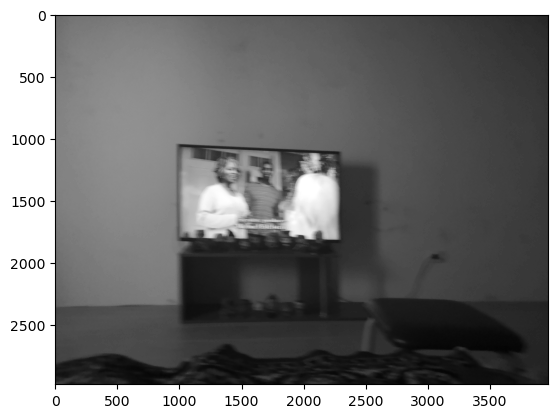

In [25]:
for col in df.columns:
    for index, img_path in enumerate(df[col]):
        img = cv2.imread(img_path,0)
        img = fix_image_size(img)
        
        blur_df.loc[index, col] = estimate_blur(img)
        print(index, end = ' ')

print()

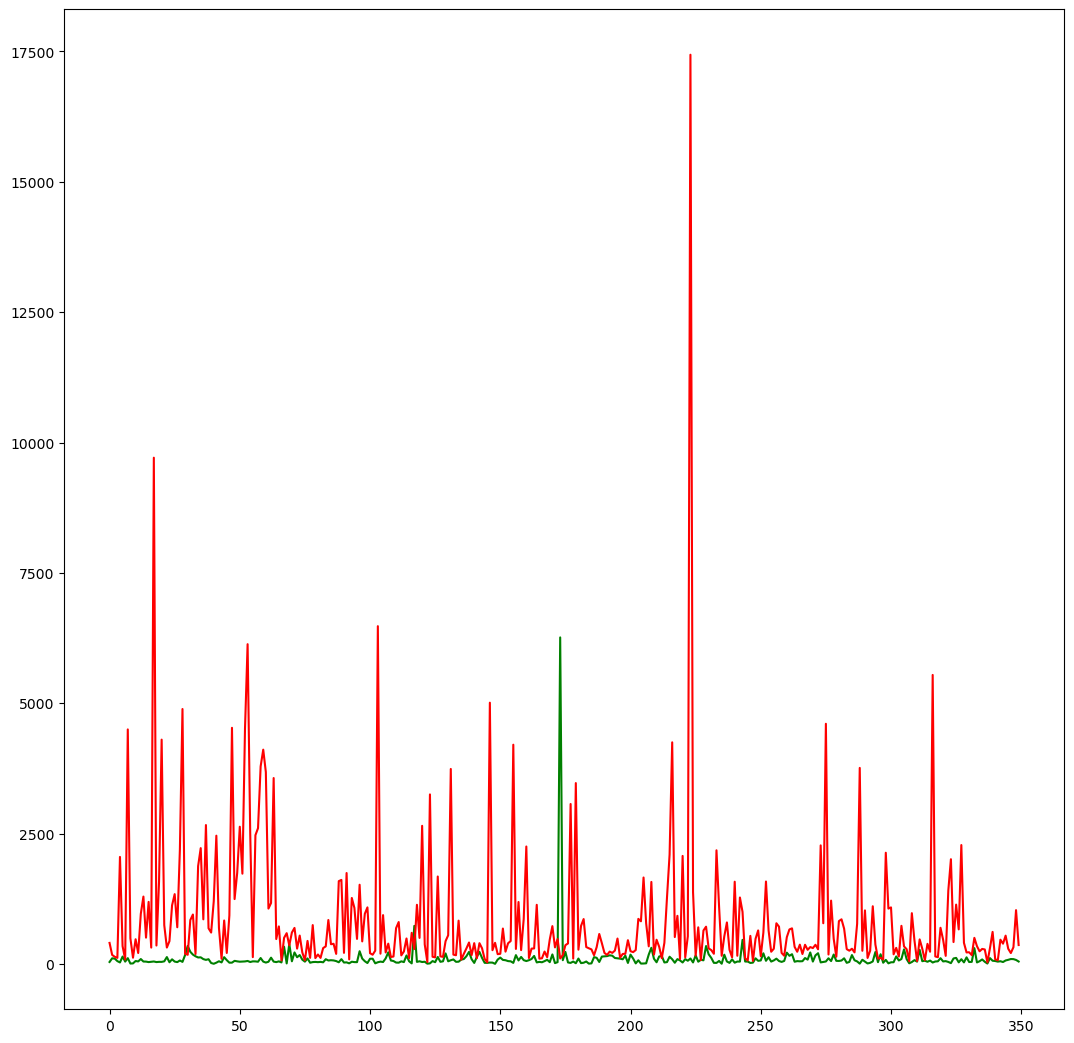

In [35]:
fig = plt.figure(figsize=(10,10))
axes = fig.add_axes([1,1,1,1])
axes.plot(blur_df['defocus_blur'],'g')
axes.plot(blur_df['sharp'],'r')

In [27]:
blur_df.loc[150:200,'defocus_blur']

150     122.594178
151      78.066324
152      71.940051
153      55.037239
154      50.945274
155      20.661597
156     169.718662
157      67.587917
158     135.214897
159      73.015989
160      56.297073
161      72.168621
162      95.616901
163     154.085682
164      30.138460
165      40.077418
166      32.890546
167      54.383588
168      80.473074
169      34.659026
170     182.869307
171      16.514484
172      34.909457
173    6262.805624
174      72.627932
175     230.904130
176      28.846568
177      20.707927
178      46.422322
179      14.305850
180     103.998226
181      16.759151
182      23.980269
183      47.259752
184       6.745222
185      11.695934
186     131.040529
187     118.283791
188      38.405093
189     141.583039
190     145.958221
191     150.892112
192     166.022787
193     158.817937
194     114.640900
195     109.216021
196     102.328819
197      89.988385
198     159.783529
199      19.691339
200     179.207217
Name: defocus_blur, dtype: floa

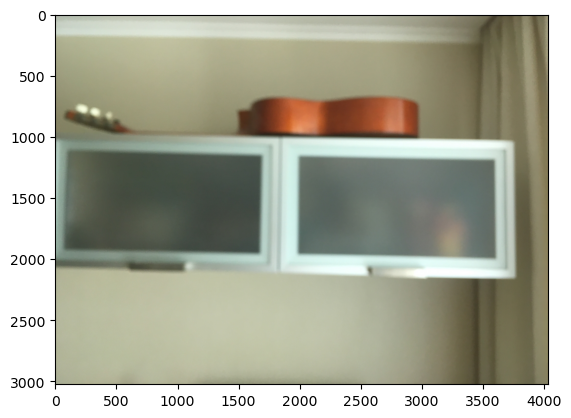

In [33]:
test = cv2.imread(df.loc[173,'defocus_blur'])
test = cv2.cvtColor(test, cv2.COLOR_BGR2RGB)
plt.imshow(test)

In [36]:
max_acc = -1
max_acc_th = -1

def calc_metrics(tp,tn,fp,fn):
    acc = (tp + tn)/(tp+tn+fp+fn)
    recall = tp/(tp+fn)
    prec = tp/(tp+fp)
    f1 = 2*tp/(2*tp+fp+fn)
    return acc, recall, prec, f1

In [37]:
for threshold in np.arange(0,1000,1):
    tn = len(blur_df[blur_df['defocus_blur'] < threshold])
    tp = len(blur_df[blur_df['sharp'] > threshold])
    fn = len(blur_df[blur_df['sharp'] < threshold])
    fp = len(blur_df[blur_df['defocus_blur'] > threshold])
    accuracy = (tp + tn)/(tp+tn+fp+fn)
    if accuracy >= max_acc:
        max_acc = accuracy
        max_acc_th = np.round(threshold,2)

In [39]:
tn = len(blur_df[blur_df['defocus_blur'] < max_acc_th])
tp = len(blur_df[blur_df['sharp'] > max_acc_th])
fn = len(blur_df[blur_df['sharp'] < max_acc_th])
fp = len(blur_df[blur_df['defocus_blur'] > max_acc_th])
accuracy, recall, precision, f1 = calc_metrics(tp,tn,fp,fn)
print(np.round(max_acc_th,2))
print("Accuracy: ",accuracy)
print("Recall: ",recall)
print("Precision: ",precision)
print("F1: ",f1)

167
Accuracy:  0.8614285714285714
Recall:  0.8285714285714286
Precision:  0.8868501529051988
F1:  0.8567208271787297
